<a href="https://colab.research.google.com/github/gasparSanchez/Innovacion/blob/main/Analisis_Inn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis gráfico automatizado de los datos en Fundanet/Innova con Python y Google Colab

Conectamos con la hoja Excel en Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Lectura de la hoja Excel para crear el dataset df. La hoja tienne la siguiente estrucxtura de columnas:


*   **Número:** Codigo único de identificación del proyecto
*   **F.Registro:** Fecha de registro del proyecto en la base de datos
*   **Título:** Nombre del proyecto
*   **Grupo Innovación:** OSI participantes en el proyecto
*   **Autor Correspondencia:** IP del proyecto
*   **Código:** INNOSASUN o BALISASUN
*   **Área:** Área de conocimiento en el que se enmarcace el proyecto
*   **Tipo:** Clasificacción del proyecto de acuerdo a su naturaleza
*   **Estado:** Clasificación de acuerdo al estado de desarrollo del proyecto en la fecha en la que se realiza la consulta de acuerdo al embudo de innovación.
*   **Código Ayuda:** Código correspondiente a la ayuda a la que ha optado el proyecto.
*   **Situación:** Situación de resolución de la ayuda solicitada
*   **F.Inicio:** Fecha de inicio de la ayuda 
*   **F.Fin:** Fecha de finalización de la ayuda concedida
*   **Importe total:** Importe en euros de la ayuda
*   **Modo de financiación:** Tipo de la ayuda
*   **Naturaleza:** Alcance territorial de la ayuda solicitada

Cada fila representa un proyecto. En algunos casos las filas corresponden con distintas ayudas solicitadas por un mismo proyecto. En ese caso la fila contiene el campo **Número** que identifica univocamente el proyecto con el resto de filas en blanco hasta el **Código** de identificación de la ayuda.

Para cada proyecto pueden existir campos en blanco.










In [ ]:
import pandas as pd

# Carga el archivo Excel
df = pd.read_excel('/content/drive/MyDrive/TRABAJO/2023/2023 Bioaraba/2023 Innovación Proyectos/Listado proyectos activos UAI_2023_02_27.xlsx')
#df.head(1)


# Estadística básica descriptiva de los datos

## Grupo de Innovación

In [ ]:
#columna_Estado = df['Estado']
columna_OSI = df['Grupo Innovación']

#columna_Estado.value_counts()
columna_OSI.value_counts()

OSI ARABA                                               56
GRUPO OSI ARA - OSIBB                                    6
GRUPO OSI ARA - OSI BB - OSI DON                         3
GRUPO OSI ARA - OSI EEC                                  2
GRUPO OSIARA - RSMB - RSMG                               1
GRUPO OSI ARA - OSI BG - OSI DON                         1
GRUPO OSI ARA - OSI DON - OSI EEC                        1
GRUPO OSI ARA - OSI BB - OSI BG - OSI EEC- BIOEF         1
GRUPO OSI ARA - OSI BB - OSI BG -  OSI DON -  OSIEEC     1
OSI ARABAKO ERRIOXA                                      1
GRUPO OSI ARA - RSMB                                     1
Name: Grupo Innovación, dtype: int64

In [ ]:
import plotly.express as px

# Obtener los valores y etiquetas para el gráfico de pastel
valores = columna_OSI.value_counts().values.tolist()
etiquetas = columna_OSI.value_counts().index.tolist()

# Crear la figura y el gráfico de pastel
fig = px.pie(values=valores, names=etiquetas)

# Personalizar el gráfico
fig.update_layout(title='Grupo de Innovación',
                  showlegend=True)

# Mostrar el gráfico
fig.show()


## Código del proyecto según origen de la idea

In [ ]:
columna_Codigo = df['Código']

columna_Codigo.value_counts()

BALIOSASUN    39
INNOSASUN     33
Name: Código, dtype: int64

In [ ]:
import plotly.express as px

# Obtener los valores y etiquetas para el gráfico de pastel
valores = columna_Codigo.value_counts().values.tolist()
etiquetas = columna_Codigo.value_counts().index.tolist()

# Crear la figura y el gráfico de pastel
fig = px.pie(values=valores, names=etiquetas)

# Personalizar el gráfico
fig.update_layout(title='Código de los proyectos según origen de la idea',
                  showlegend=True)

# Mostrar el gráfico
fig.show()


In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Crear el gráfico
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['F.Registro'], y=df['Tipo'], mode='markers'))

# Personalizar el gráfico
fig.update_layout(title='Proyectos por tipo y fecha',
                  xaxis_title='Fecha de registro',
                  yaxis_title='Tipo de proyecto')

# Mostrar el gráfico
fig.show()


In [ ]:
import plotly.graph_objs as go
import pandas as pd

# Cargar los datos
#my_data = pd.read_csv('ruta/a/tus/datos.csv')
# my_data en mi caso es df

# Crear el gráfico
fig = go.Figure()
for estado in df['Estado'].unique():
    data = df[df['Estado'] == estado]
    fig.add_trace(go.Scatter(x=data['F.Registro'], y=data['Tipo'], mode='markers', name=estado))

# Personalizar el gráfico
fig.update_layout(title='Proyectos por tipo y fecha',
                  xaxis_title='Fecha de registro',
                  yaxis_title='Tipo de proyecto')

# Mostrar el gráfico
fig.show()


## Mapa de calor

In [ ]:
import plotly.graph_objs as go
import pandas as pd

# Crear tabla de frecuencia cruzada
tabla = pd.crosstab(df['Área'], df['Tipo'])

# Crear mapa de calor con plotly
fig = go.Figure(data=go.Heatmap(z=tabla.values,
                                 x=tabla.columns.tolist(),
                                 y=tabla.index.tolist()))

# Personalizar el gráfico
fig.update_layout(title='Tabla de Frecuencia Cruzada',
                  xaxis_title='Tipo de Proyecto',
                  yaxis_title='Área')

# Mostrar el gráfico
fig.update_layout(width=800, height=600)
fig.show()


## Diagrama de Sankey

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Cargar los datos
# df = pd.read_csv('ruta/a/tus/datos.csv')

# Crear tabla de frecuencia cruzada
tabla = pd.crosstab(df['Área'], df['Tipo'])

# Crear lista de nodos
nodos = []
for area in tabla.index:
    nodos.append(dict(label=[area]))
for tipo in tabla.columns:
    nodos.append(dict(label=[tipo]))

# Crear lista de enlaces
enlaces_fuente = []
for i in range(len(tabla.index)):
    for j in range(len(tabla.columns)):
        enlaces_fuente.append(i)
enlaces_destino = []
for j in range(len(tabla.columns)):
    for i in range(len(tabla.index)):
        enlaces_destino.append(len(tabla.index) + j)
valores = tabla.values.flatten()

# Crear diagrama de Sankey con plotly
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=[nodo['label'][0] for nodo in nodos],
        customdata=[],
        hovertemplate='Node %{label} has total value %{value}<extra></extra>',
        color="blue"
    ),
    link=dict(
        source=enlaces_fuente,
        target=enlaces_destino,
        value=valores,
        customdata=[],
        hovertemplate='Link from node %{source.label[0]}<br />'+
        'to node %{target.label[0]}<br />has value %{value}'+
        '<br />and data %{customdata}<extra></extra>',
    )
)])

# Personalizar el gráfico
fig.update_layout(title_text="Diagrama de Sankey", font_size=10)

# Mostrar el gráfico
fig.update_layout(width=500, height=600)
fig.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Cargar los datos
# df = pd.read_csv('ruta/a/tus/datos.csv')

# Crear tabla de frecuencia cruzada
tabla1 = pd.crosstab(df['Área'], df['Tipo'])
tabla2 = pd.crosstab(df['Tipo'], df['Estado'])

# Crear lista de nodos
nodos = []
for area in tabla1.index:
    nodos.append(dict(label=[area]))
for tipo in tabla1.columns:
    nodos.append(dict(label=[tipo]))
for estado in tabla2.columns:
    nodos.append(dict(label=[estado]))

# Crear lista de enlaces
enlaces_fuente = []
for i in range(len(tabla1.index)):
    for j in range(len(tabla1.columns)):
        enlaces_fuente.append(i)
for i in range(len(tabla1.index), len(tabla1.index) + len(tabla1.columns)):
    for j in range(len(tabla2.columns)):
        enlaces_fuente.append(i)
enlaces_destino = []
for j in range(len(tabla1.columns)):
    for i in range(len(tabla1.index)):
        enlaces_destino.append(len(tabla1.index) + j)
for i in range(len(tabla1.index), len(tabla1.index) + len(tabla1.columns)):
    for j in range(len(tabla2.columns)):
        enlaces_destino.append(len(tabla1.index) + len(tabla1.columns) + j)
valores = list(tabla1.values.flatten()) + list(tabla2.values.flatten())

# Crear diagrama de Sankey con plotly
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=15,
        line=dict(color="black", width=0.5),
        label=[nodo['label'][0] for nodo in nodos],
        customdata=[],
        hovertemplate='Node %{label} has total value %{value}<extra></extra>',
        color=["blue"]*len(tabla1.index) + ["red"]*len(tabla1.columns) + ["green"]*len(tabla2.index)
    ),
    link=dict(
        source=enlaces_fuente,
        target=enlaces_destino,
        value=valores,
        customdata=[],
        hovertemplate='Link from node %{source.label[0]}<br />'+
        'to node %{target.label[0]}<br />has value %{value}'+
        '<br />and data %{customdata}<extra></extra>',
        color="gray"
    )
)])

# Personalizar el gráfico
fig.update_layout(title_text="Diagrama de Sankey", font_size=10)

# Mostrar el gráfico
fig.update_layout(width=1000, height=600)
fig.show()


# Indicadores de proceso

## El embudo de innovación

Número de proyectos que se encuentran en las distintas etapas del proceso de innovación. 

El indicador más sencillo es el recuento del número de proyectos en cada una de las etapas.

In [ ]:
columna_Estado = df['Estado']
columna_Estado.value_counts()

Desarrollo       45
Mercado          12
Captación         8
Análisis          6
Transferencia     3
Name: Estado, dtype: int64

Una primera representación gráfica de esta información podría ser un pie chart.

In [ ]:
import plotly.graph_objects as go

# Calcular recuento de proyectos por estado
estado_counts = df['Estado'].value_counts()

# Crear lista de etiquetas y valores
labels = estado_counts.index.tolist()
values = estado_counts.values.tolist()

# Crear donut chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])

# Personalizar el gráfico
fig.update_traces(marker=dict(colors=['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']), 
                  textinfo='percent+label', 
                  textfont_size=12,
                  hovertemplate = "<b>%{label}</b><br>%{value} proyectos<br>%{percent:.1%}")

fig.update_layout(title_text="Recuento de proyectos por estado", font_size=14)

# Mostrar el gráfico
fig.show()


Para cada una de las áreas puedo ver la proporción de proyectos que se encuentra en cada uno de los distintos estados.

In [ ]:
import plotly.express as px

# Agrupar por área y estado y obtener el recuento
count_df = df.groupby(['Área', 'Estado']).size().reset_index(name='count')

# Crear el gráfico de barras
fig = px.bar(count_df, x="Área", y="count", color="Estado", title="Proyectos por Área y Estado")

# Mostrar el gráfico
fig.show()


Y lo mismo para los distintos tipos de proyecto

In [ ]:
import plotly.express as px

# Agrupar por área y estado y obtener el recuento
count_df = df.groupby(['Tipo', 'Estado']).size().reset_index(name='count')

# Crear el gráfico de barras
fig = px.bar(count_df, x="Tipo", y="count", color="Estado", title="Proyectos por Tipo y Estado")

# Mostrar el gráfico
fig.show()


## Participación de profesionales en actividades de innovación

In [ ]:
columna_IP = df['Autor Correspondencia']

columna_IP.value_counts()

JAVIER ARITZ URCOLA CARRERA              5
GONZAGA GARAY ARAMBURU                   4
HELENA BARRASA GONZALEZ                  3
JOAQUIN JOSE DURAN CANTOLLA              3
ANA MARIA GONZALEZ PINTO ARRILLAGA       3
IMANOL MERINO NARRO                      2
CARLOS JAVIER EGEA SANTAOLALLA           2
GASPAR SANCHEZ MERINO                    2
FERNANDO MARTINEZ CARBALLAL              2
IGNACIO DIEZ LOPEZ                       2
IRATXE SALCEDO PACHECO                   2
GUIOMAR PEREZ DE NANCLARES LEAL          1
LOURDES BASABE DESMONTS                  1
FRANCISCO JAVIER RIBAS SOLIS             1
JOSE MARIA MARIMON ORTIZ DE ZARATE       1
RUBEN GONZALEZ BURGUERA                  1
ESTHER CORRAL LOZANO                     1
VICENTE GARCIA GONZALEZ                  1
ANA ELENA LAPUENTE TRONCOSO              1
MARTA MENDAZA MARTINEZ                   1
SANDRA SAEZ DE ARREGUI MORENO            1
ANGELA GOMEZ MORENO                      1
RAUL ZABALLA FERNANDEZ                   1
IZARO KORTA

In [ ]:
num_ip_distintos = df['Autor Correspondencia'].nunique()
num_ip_distintos

48

In [ ]:
import plotly.express as px
import pandas as pd

# Obtener los datos de tu columna
columna_IP = df['Autor Correspondencia']

# Obtener el recuento de cada categoría en la columna
datos = columna_IP.value_counts()

# Convertir a DataFrame y resetear índices
datos = pd.DataFrame({'IP':datos.index, 'Número de proyectos':datos.values}).reset_index(drop=True)

# Crear gráfico de barras
fig = px.bar(datos, x='IP', y='Número de proyectos')

# Personalizar el gráfico
fig.update_layout(title='Número de proyectos pr IP',
                  showlegend=False)

# Mostrar gráfico
fig.show()


Puedo representar para cada IP el número de proyectos que tiene en cada uno de los estados.

In [ ]:
import plotly.express as px
import pandas as pd

# Obtener los datos de tu columna
columna_IP = df['Autor Correspondencia']

# Obtener el recuento de cada categoría en la columna
datos = df.groupby(['Autor Correspondencia', 'Estado']).size().reset_index(name='count')

# Crear gráfico de barras
fig = px.bar(datos, x='Autor Correspondencia', y='count', color='Estado', title='Proyectos por Autor Correspondencia y Estado')

# Personalizar el gráfico
fig.update_layout(showlegend=True, xaxis_title='Autor Correspondencia', yaxis_title='Número de proyectos')

# Mostrar gráfico
fig.show()


# Indicadores de resultados

Lo primero que podemos calcular es la cantidad capturada en ayudas por todos los proyectos

In [ ]:
suma = df['Importe Total'].sum()

suma

1629796.02

Luego puedo ver cómo se distribuye esta cantidad entre los distintos proyectos

In [ ]:
total_por_proyecto = df.groupby('Número')['Importe Total'].sum()

total_por_proyecto



Número
2010/4      15730.00
2012/40         0.00
2014/71         0.00
2014/77         0.00
2015/134    24801.26
              ...   
2022/89         0.00
2023/10         0.00
2023/7          0.00
2023/8          0.00
2023/9          0.00
Name: Importe Total, Length: 74, dtype: float64

In [ ]:
import plotly.graph_objs as go

# Crear la figura y el gráfico de barras
fig = go.Figure(data=[go.Bar(x=total_por_proyecto.index, y=total_por_proyecto)])

# Personalizar el gráfico
fig.update_layout(title='Total por proyecto',
                  xaxis_title='Proyecto',
                  yaxis_title='Importe total (€)')

# Mostrar el gráfico
fig.show()


Y por las distintas áreas

In [ ]:
total_por_area = df.groupby('Área')['Importe Total'].sum()
total_por_area

Área
Alergia/Inmunología                0.00
CNS/Neurología                  2000.00
Cardiovascular                     0.00
Cirugía                         5905.00
Endocrinología/Metabolismo         0.00
Enfermedades Infecciosas       62951.00
Gastrointestinal                   0.00
Ginecología/Obstetricia            0.00
Hematología                    11578.99
Oftalmología                  252338.54
Otros                         113239.64
Pediatría                          0.00
Radiología                         0.00
Reproducción del hombre            0.00
Respiratorio/Pulmonar          67050.00
Reumatología/Artritis          14000.00
Transversal                    76792.50
Name: Importe Total, dtype: float64

In [ ]:
import plotly.graph_objs as go

# Crear la figura y el gráfico de barras
fig = go.Figure(data=[go.Bar(x=total_por_area.index, y=total_por_area.values)])

# Personalizar el gráfico
fig.update_layout(title='Total por área',
                  xaxis_title='Área',
                  yaxis_title='Importe total (€)')

# Mostrar el gráfico
fig.show()


La distribución según los distintos modos de financiación

In [ ]:
df['Modo Financiación'].value_counts()

Subvención directa                                        60
Convocatorias-Competitivo                                 29
Fact. Estudios Clínicos                                    9
Convocatorias-competitivo-subcontratados                   6
CONVENIOS: OTROS                                           5
Sin financiación externa                                   4
Fact. Prestación de Servicios en Investigación Clínica     2
EITB Maratoia                                              2
Fact Serv: Otros                                           1
Name: Modo Financiación, dtype: int64

In [ ]:
import plotly.graph_objects as go

# Calcular recuento de proyectos por estado
financiacion_counts = df['Modo Financiación'].value_counts()

# Crear lista de etiquetas y valores
labels = financiacion_counts.index.tolist()
values = financiacion_counts.values.tolist()

# Crear donut chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])

# Personalizar el gráfico
fig.update_traces(marker=dict(colors=['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']), 
                  textinfo='percent+label', 
                  textfont_size=12,
                  hovertemplate = "<b>%{label}</b><br>%{value} proyectos<br>%{percent:.1%}")

fig.update_layout(title_text="Recuento de proyectos por modo de financiación", font_size=14)

# Mostrar el gráfico
fig.show()

Y la financiación según el alacnce territorial de la ayuda solicitada. Teniendo en cuenta que no todas estas ayudas se han conseguido.

In [ ]:
df['Naturaleza'].value_counts()

Autonómico                                            91
Estatal                                               10
Local                                                  9
Europeo o Internacional                                7
Estatal - Fondos FEDER                                 6
Fondos del mecanismo de recuperación y resiliencia     1
Name: Naturaleza, dtype: int64

In [ ]:
import plotly.graph_objects as go

# Calcular recuento de proyectos por estado
naturaleza_counts = df['Naturaleza'].value_counts()

# Crear lista de etiquetas y valores
labels = naturaleza_counts.index.tolist()
values = naturaleza_counts.values.tolist()

# Crear donut chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])

# Personalizar el gráfico
fig.update_traces(marker=dict(colors=['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']), 
                  textinfo='percent+label', 
                  textfont_size=12,
                  hovertemplate = "<b>%{label}</b><br>%{value} proyectos<br>%{percent:.1%}")

fig.update_layout(title_text="Recuento de proyectos por alcance de la ayuda", font_size=14)

# Mostrar el gráfico
fig.show()

Vamos a ver que obtenemos si filtramos sólo a aquellos proyectos que han conseguido financiación. Vamos a poder calcular la tasa de éxito comparando los totales de solicitudes con los concedidos.

In [ ]:
financiados = df[(df['Importe Total'] != 0) & (df['Importe Total'].notna())]


In [ ]:
financiados['Modo Financiación'].value_counts()

Subvención directa                          35
Convocatorias-Competitivo                   16
CONVENIOS: OTROS                             5
EITB Maratoia                                2
Fact. Estudios Clínicos                      1
Fact Serv: Otros                             1
Sin financiación externa                     1
Convocatorias-competitivo-subcontratados     1
Name: Modo Financiación, dtype: int64

In [ ]:
total = df['Modo Financiación'].value_counts()
concedido = financiados['Modo Financiación'].value_counts()

concedido/total

CONVENIOS: OTROS                                          1.000000
Convocatorias-Competitivo                                 0.551724
Convocatorias-competitivo-subcontratados                  0.166667
EITB Maratoia                                             1.000000
Fact Serv: Otros                                          1.000000
Fact. Estudios Clínicos                                   0.111111
Fact. Prestación de Servicios en Investigación Clínica         NaN
Sin financiación externa                                  0.250000
Subvención directa                                        0.583333
Name: Modo Financiación, dtype: float64

Puedo hacer lo mismo según la naturaleza de la ayuda

In [ ]:
totalN = df['Naturaleza'].value_counts()
concedidoN = financiados['Naturaleza'].value_counts()

concedidoN/totalN


Autonómico                                            0.549451
Estatal                                               0.500000
Estatal - Fondos FEDER                                0.666667
Europeo o Internacional                                    NaN
Fondos del mecanismo de recuperación y resiliencia         NaN
Local                                                 0.333333
Name: Naturaleza, dtype: float64

Vamos a visualizar el núemro de días, contados desde su fecha de regsitro, que tardan los proyectos en llegar hasta el nivel de desarrollo en el que se encuentran.

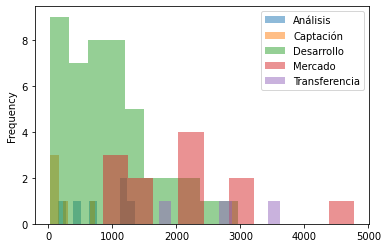

In [ ]:
df['F.Registro'] = pd.to_datetime(df['F.Registro'])

from datetime import datetime

today = datetime.today().date()
df['Dias transcurridos'] = (today - df['F.Registro'].dt.date).dt.days

import matplotlib.pyplot as plt

df.groupby('Estado')['Dias transcurridos'].plot(kind='hist', alpha=0.5, legend=True)

plt.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

for estado in df['Estado'].unique():
    fig.add_trace(go.Histogram(x=df[df['Estado'] == estado]['Dias transcurridos'],
                                name=estado, opacity=0.5))

fig.update_layout(barmode='overlay',
                  title='Distribución de días transcurridos por estado',
                  xaxis_title='Días transcurridos',
                  yaxis_title='Número de proyectos')

fig.show()


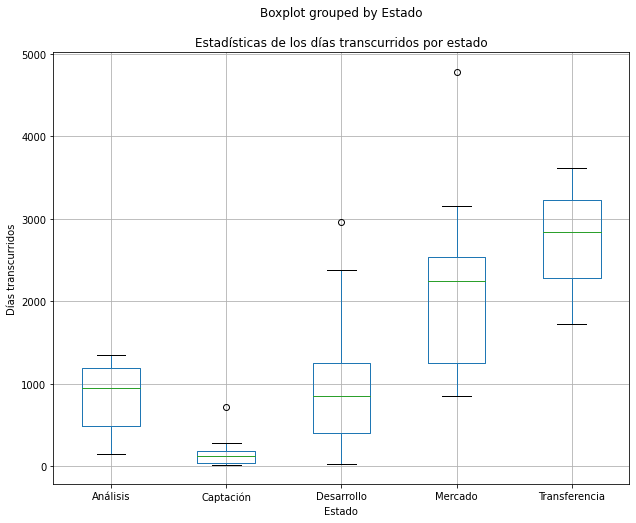

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Convertir la columna 'F.Registro' a formato de fecha
df['F.Registro'] = pd.to_datetime(df['F.Registro'])

# Calcular los días transcurridos y agregarlos como una nueva columna
today = datetime.today().date()
df['Dias transcurridos'] = (today - df['F.Registro'].dt.date).dt.days

# Crear un diagrama de caja de los días transcurridos para cada estado
df.boxplot(column='Dias transcurridos', by='Estado', figsize=(10, 8))

# Establecer las etiquetas de los ejes y el título del gráfico
plt.xlabel('Estado')
plt.ylabel('Días transcurridos')
plt.title('Estadísticas de los días transcurridos por estado')

# Mostrar la gráfica
plt.show()


In [ ]:
import plotly.express as px
import pandas as pd
from datetime import datetime

# Convertir la columna 'F.Registro' a formato de fecha
df['F.Registro'] = pd.to_datetime(df['F.Registro'])

# Calcular los días transcurridos y agregarlos como una nueva columna
today = datetime.today().date()
df['Dias transcurridos'] = (today - df['F.Registro'].dt.date).dt.days

# Crear el diagrama de caja con Plotly
fig = px.box(df, x='Estado', y='Dias transcurridos', title='Estadísticas de los días transcurridos por estado')

# Mostrar el gráfico
fig.show()
